# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

## Loading the dataset

In [76]:
data_loaded = pd.read_csv("Loan_Modelling.csv")
data = data_loaded.copy()

## Data Overview

* Observations
* Sanity checks

In [3]:
data.shape

(5000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
data.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
data["ID"].nunique()

5000

In [8]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

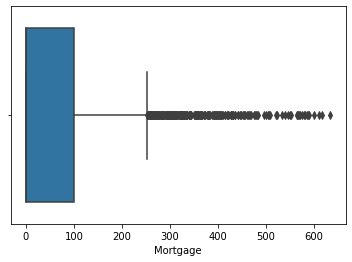

In [19]:
sns.boxplot(data=data, x='Mortgage');

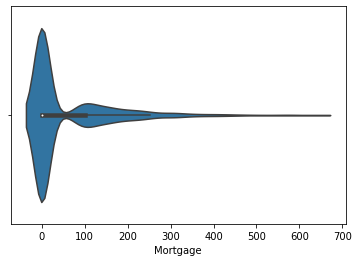

In [20]:
sns.violinplot(data=data, x='Mortgage');

* Observations
    * The mortgage value seems to have 75% of the value below 100

In [32]:
data[data['CreditCard'] == 1].shape

(1470, 14)

* 1470 customers have credit cards

In [50]:
data[data['Personal_Loan'] == 1].shape

(480, 14)

* Out of 5000 customers, 480 have taken personal loan (Personal_Loan = 1), which is 9.6%
* So 9.6% have taken personal loan and 90.4% have not taken

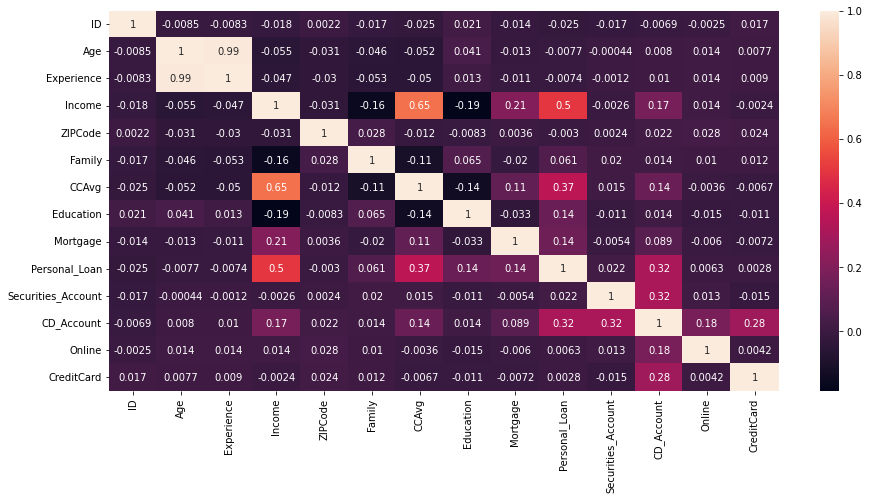

In [38]:
plt.figure(figsize=(15,7))
sns.heatmap(data=data.corr(), annot=True);

* Income, CCAvg, CD_Account have the most correlation to Personal_Loan

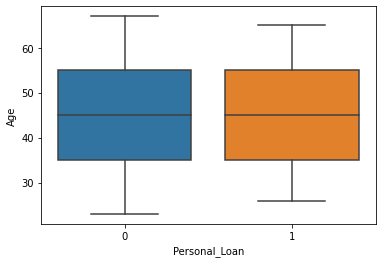

In [43]:
sns.boxplot(data=data, x='Personal_Loan', y='Age');

* Whether a person took a personal loan or not, doesn't seem to be much vary with the age.

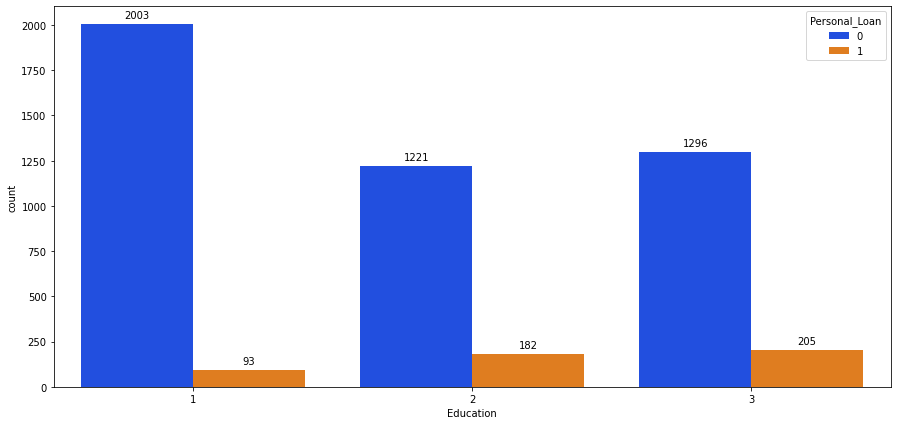

In [49]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=data, hue='Personal_Loan', x='Education',palette= 'bright');
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')


Of 480 people who have a personal loan
- 205 (42.7% have Advanced/Professional education)
- 182 (37.9% are Graduate)
- 93 (19.4% are Undergrad)

Roughly 80% of people who have a personal loan have either Graduate or higher education. Seems to be a strong positive indicator of if a person will take a loan.

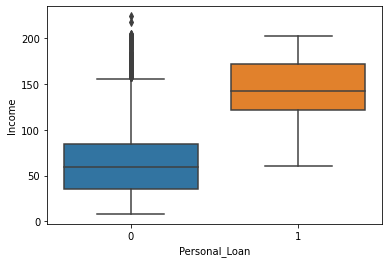

In [57]:
sns.boxplot(data=data, x='Personal_Loan', y='Income');

* Income has a strong positive correlation with Personal loan attribute as we saw earlier in the heatmap. 
* With this boxplot we see that most of the customers who have taken loan have an income between ~80 to ~200 thousand dollars
* Median salary seems to be ~140 thousand dollars for customers who have loans
* Looking at the people who have not taken loans, though the median salary is lower, we still have more than 25% of people well within
 the range of ~80 to ~150. Also there are outliers with very high incomes. These are possibly target customers for marketing the loan

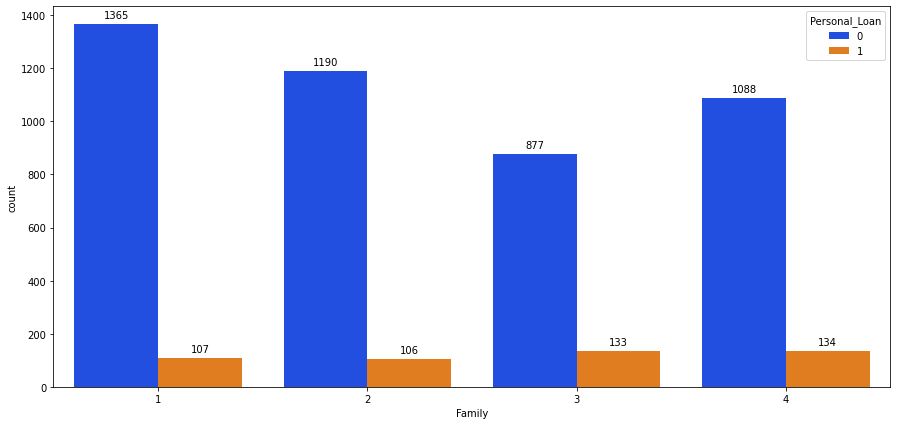

In [202]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=data, hue='Personal_Loan', x='Family',palette= 'bright');
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 9), textcoords='offset points')


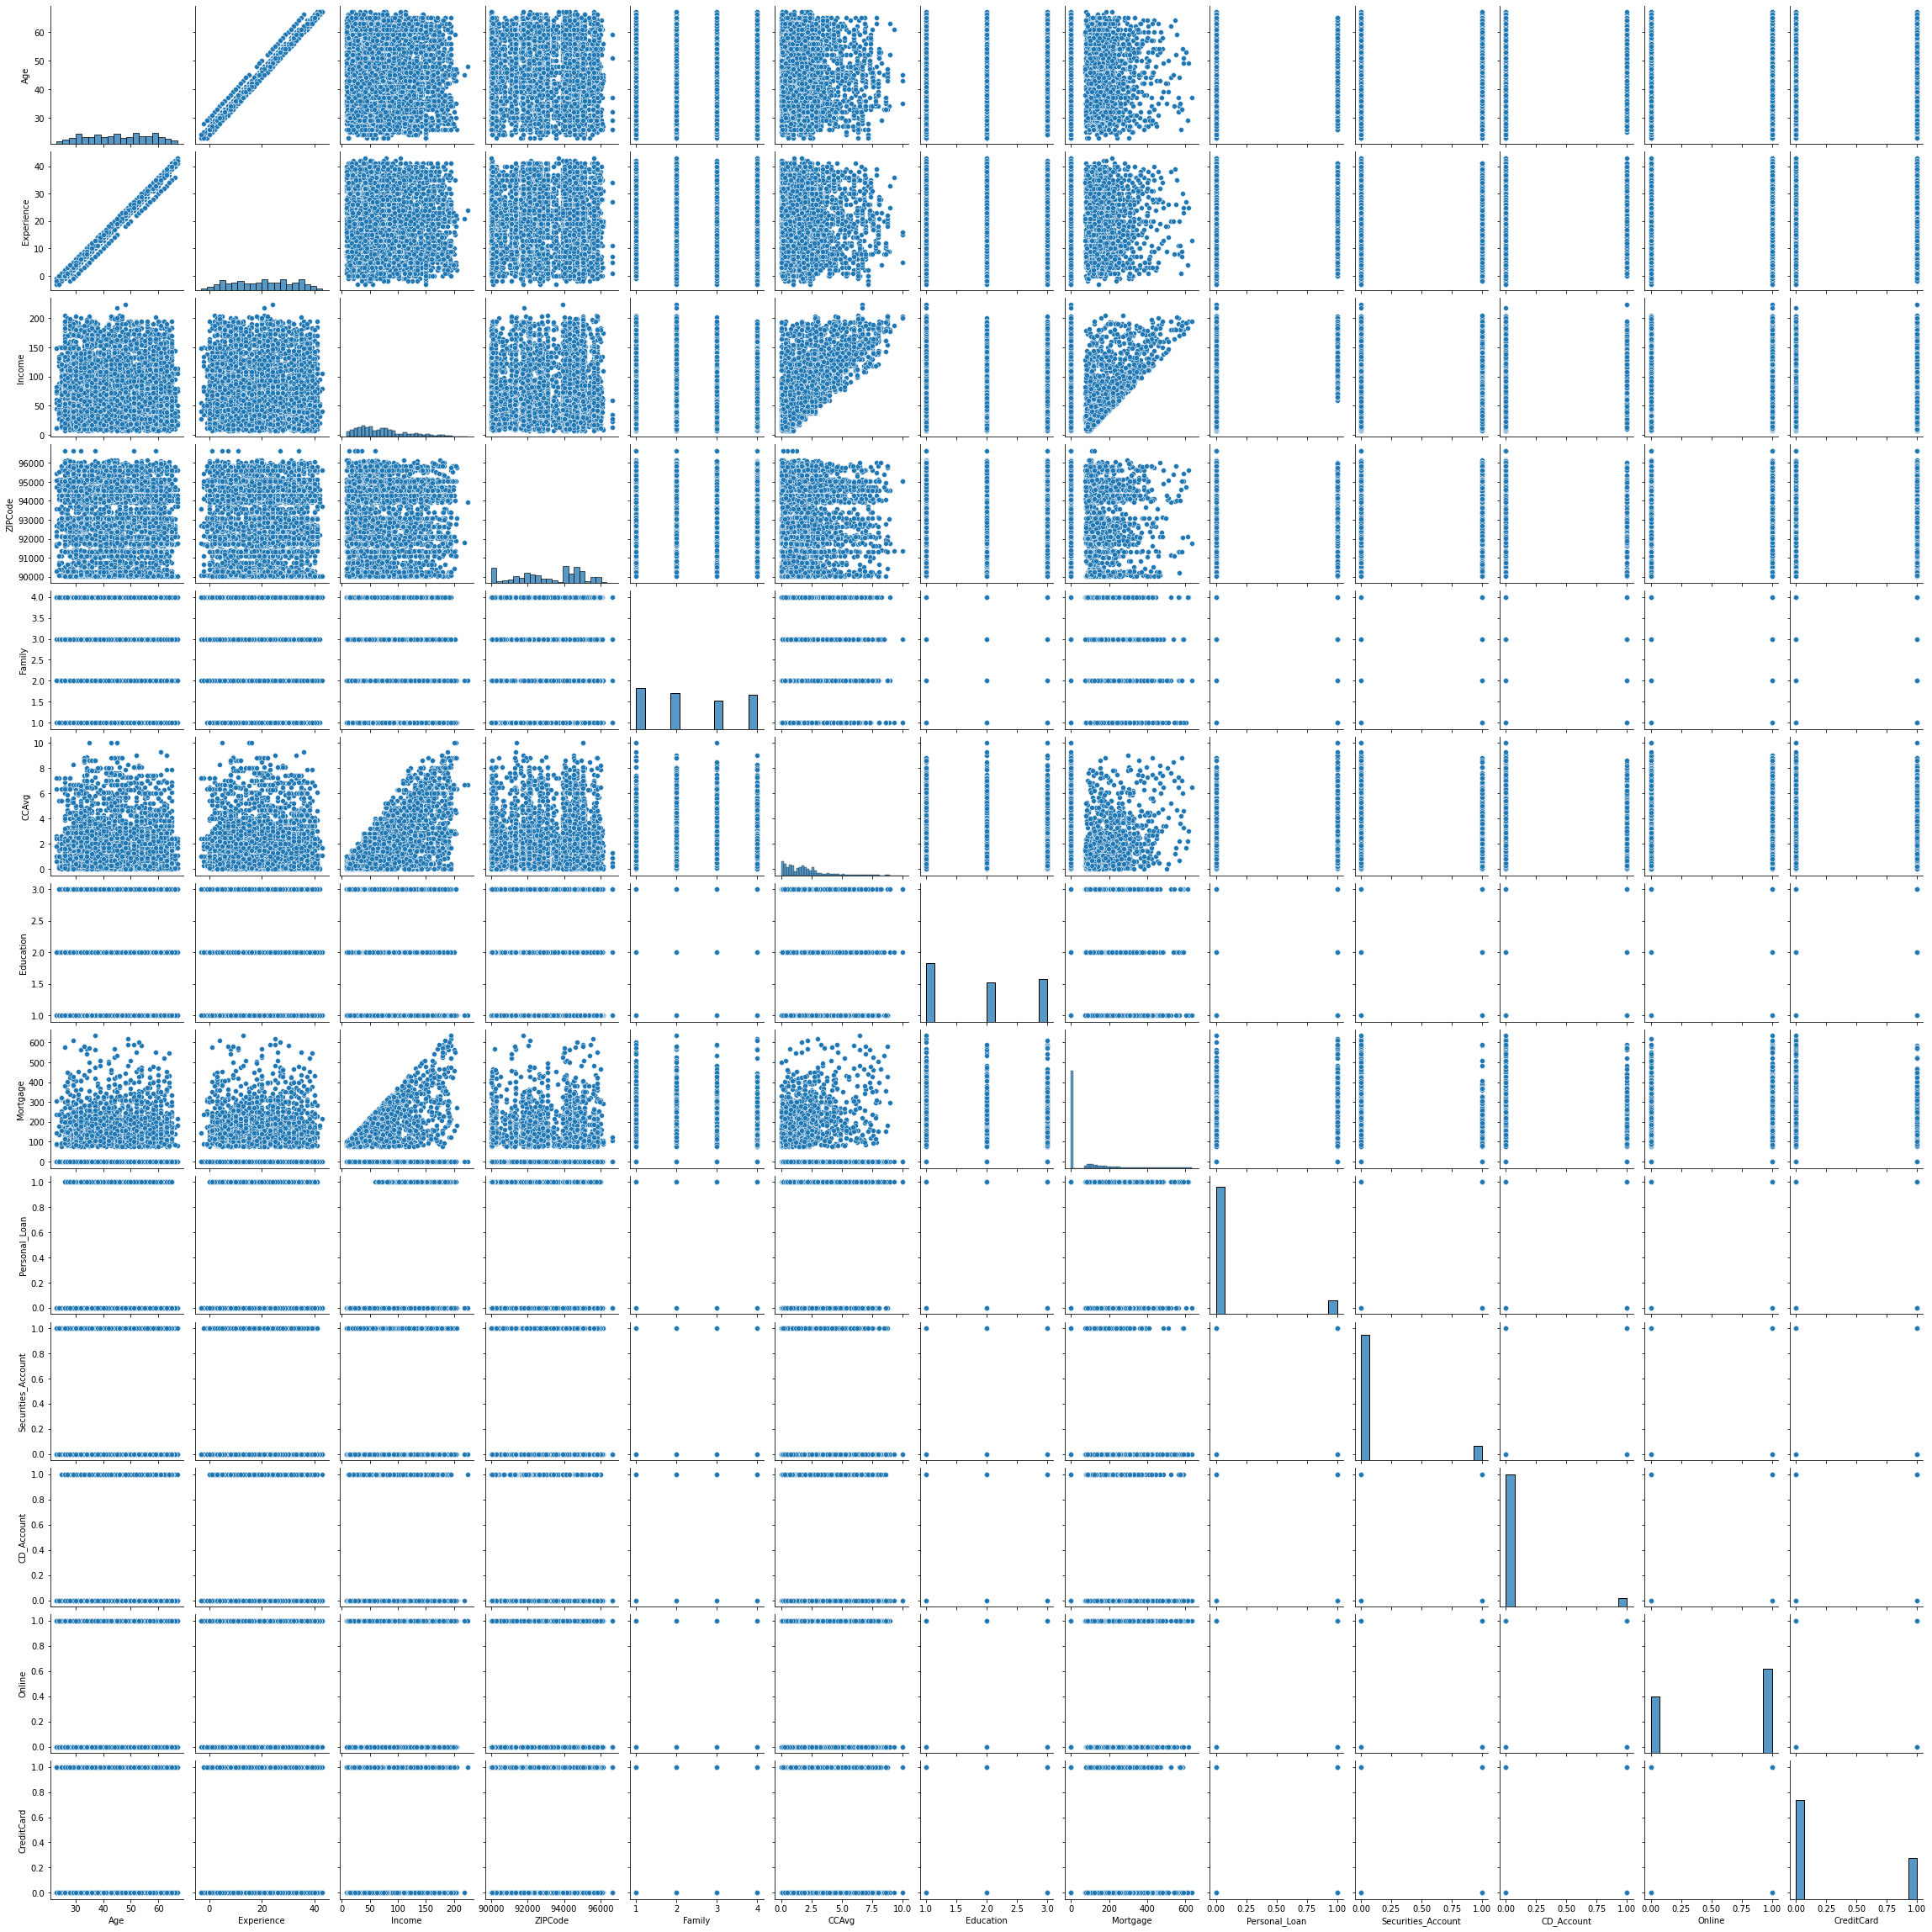

In [134]:
sns.pairplot(data)
plt.show()

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [53]:
data.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIPCode               False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal_Loan         False
Securities_Account    False
CD_Account            False
Online                False
CreditCard            False
dtype: bool

In [54]:
data.isna().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIPCode               False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal_Loan         False
Securities_Account    False
CD_Account            False
Online                False
CreditCard            False
dtype: bool

* There are no missing values in any of the columns

In [61]:
data.duplicated().sum()

0

* No duplicated values

In [62]:
data["ID"].nunique()

5000

* The ID column has all unique values. Will not be useful for modeling. We can drop it. 

In [77]:
data = data.drop(["ID"], axis=1)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


* Looking at the data type, all columns are integers, this is conducive to modeling. We wouldn't need to convert datatypes.

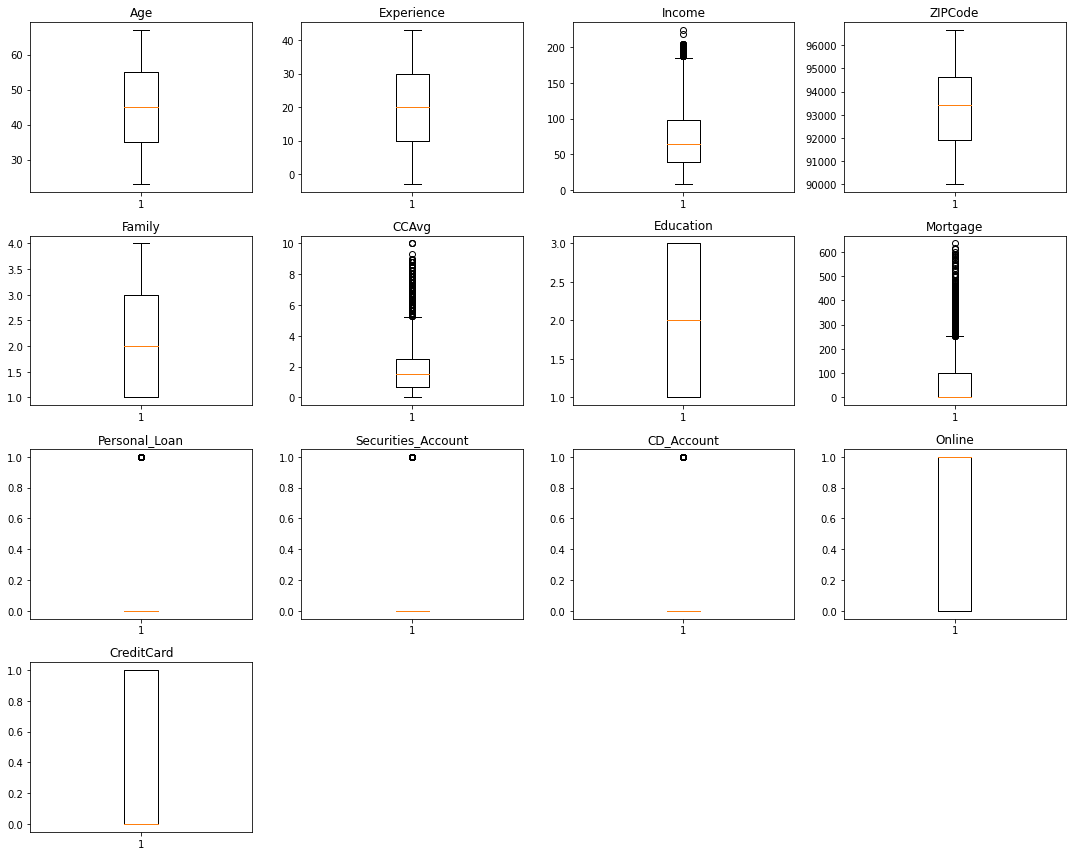

In [65]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite a few outliers especially in Mortgage, Income and CCAvg columns. 
But these are the columns with the most positive correlation with Personal_Loan attribute. Deciding not to drop outliers right now.

In [72]:
data[data['Income'] > 200]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
526,26,2,205,93106,1,6.33,1,271,0,0,0,0,1
677,46,21,204,92780,2,2.80,1,0,0,0,0,1,0
787,45,15,202,91380,3,10.00,3,0,1,0,0,0,0
1711,27,3,201,95819,1,6.33,1,158,0,0,0,1,0
1901,43,19,201,94305,2,6.67,1,0,0,1,0,1,0
2101,35,5,203,95032,1,10.00,3,0,1,0,0,0,0
2278,30,4,204,91107,2,4.50,1,0,0,0,0,1,0
2337,43,16,201,95054,1,10.00,2,0,1,0,0,0,1
2447,44,19,201,95819,2,8.80,1,0,0,0,0,1,1
2988,46,21,205,95762,2,8.80,1,181,0,1,0,1,0


In [73]:
data[data['Mortgage'] > 300]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
42,32,7,132,90019,4,1.1,2,412,1,0,0,1,0
59,31,5,188,91320,2,4.5,1,455,0,0,0,0,0
66,62,36,105,95670,2,2.8,1,336,0,0,0,0,0
112,40,15,82,91775,3,1.0,1,309,0,0,0,0,0
119,32,7,112,94304,1,4.6,1,366,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4844,31,6,81,90840,2,2.5,1,313,0,0,0,0,0
4859,34,8,165,91107,1,7.0,3,541,1,0,0,0,0
4865,50,24,133,90025,4,1.4,2,342,1,0,0,0,1
4942,52,26,109,94710,1,2.4,1,308,0,0,1,1,1


In [74]:
data[data['CCAvg'] > 5]

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
9,34,9,180,93023,1,8.90,3,0,1,0,0,0,0
18,46,21,193,91604,2,8.10,3,0,1,0,0,0,0
44,46,20,104,94065,1,5.70,1,0,0,0,0,1,1
55,41,17,139,94022,2,8.00,1,0,0,0,0,1,0
61,47,21,125,93407,1,5.70,1,112,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908,40,16,138,92121,2,6.10,1,0,0,0,0,1,0
4911,46,22,153,94539,2,7.50,1,0,0,0,0,0,0
4937,33,8,162,94960,1,8.60,1,0,0,0,1,1,1
4980,29,5,135,95762,3,5.30,1,0,1,0,1,1,1


* All these rows, though are detected as outliers in the boxplot, they seem to be valid values. So keeping them as such.

In [175]:
X = data.drop(["Personal_Loan"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 12)
Shape of test set :  (1500, 12)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


* We have seen 9.6% have taken loan and 90.4% have not taken loan in the original dataset
* This is almost maintained in the training (9.5 and 90.5) and test (9.9 and 90.0) dataset 

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
- Predicting a customer will not take loan, but in reality the customer takes (FN)
- Predicting a customer will take loan, but in reality the customer will not take loan (FP)

**Which case is more important?**

- If we predict that a customer will not take loan, but in reality the customer takes loan, then the bank misses out on reaching to that potential customer.
- If we predict that a customer will take loan, but in reality the customer does not take loan, then the bank has to bear the cost of marketing to that customer. Marketing cost is usually lesser than the profit that the customer brings if in fact they take a loan. So we can afford to have FPs but the cost of FNs will be greater. So the bank has to work on minimizing FNs.

**How to reduce the losses?**

The bank would want the recall to be maximized, greater the recall score, higher are the chances of minimizing the False Negatives.

In [81]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [82]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

#### Decision Tree (default)

In [154]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Performance of default decision tree

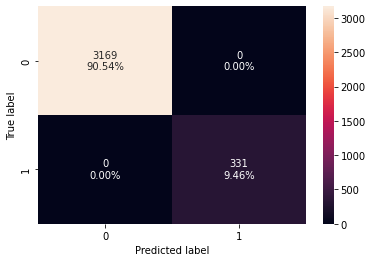

In [155]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [156]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


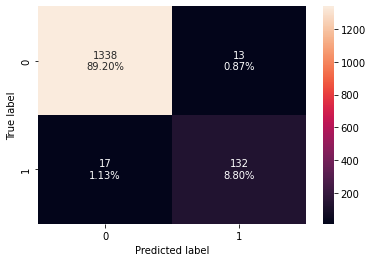

In [157]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [158]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.98,0.885906,0.910345,0.897959


* We see that recall is at 88.6% in the test data set. This needs to be maximized.

### Model Performance Improvement

#### Decision Tree (with class_weights)

* The percentage of difference between the classes (Personal_Loan = 1 and Personal_Loan = 0) is wide. 0 is the bigger class. So we can try using class_weight = balanced hyperparameter.

In [159]:
model1 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Performance metrics for model with class_weights

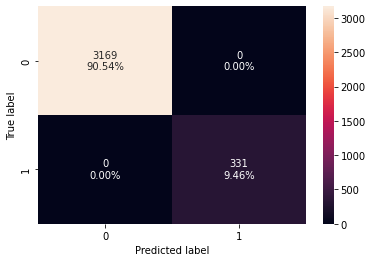

In [160]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [161]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


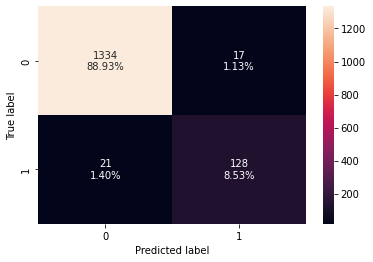

In [162]:
confusion_matrix_sklearn(model1, X_test, y_test)

In [163]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.974667,0.85906,0.882759,0.870748


* The difference between training and test metrics are not huge. So model is probably not overfitting.
* Recall got reduced after class_weights parameter got included. So not sure which hyperparameter will work. GridSearch might be helpful.

#### GridSearch

In [164]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2), # [2, 4, 6]
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

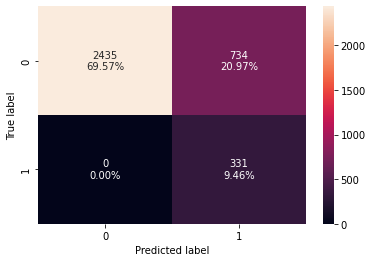

In [165]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [166]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


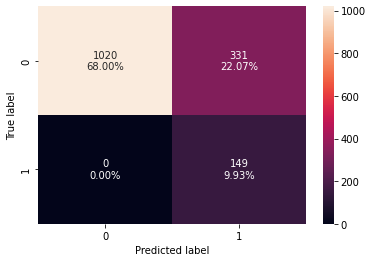

In [167]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [168]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.779333,1.0,0.310417,0.473768


#### Rationale for moving to F1 score 
* The Recall has maximized to 1.0. But there has been a drastic drop in both Precision and F1 score. Which means the balance is between precision and recall has been affected by the hyperparameter changes.
* This might result in increased cost of FPs. Which means the bank might end up spending too much on marketing to the wrong customers.
* This might also result in the bank losing some of the liability customers because they are not open to marketing. So improving the F1 score might be helpful. Lets try hyperparameter tuning with F1 score as the scorer instead of just recall.
  

In [169]:
# Choose the type of classifier.
estimatorf1 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2), # [2, 4, 6]
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimatorf1, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimatorf1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimatorf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=50,
                       random_state=1)

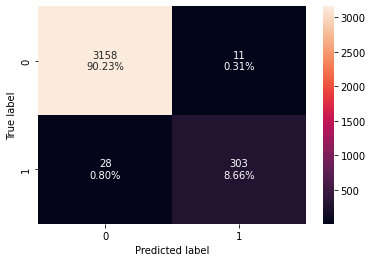

In [170]:
confusion_matrix_sklearn(estimatorf1, X_train, y_train)

In [171]:
decision_tree_tune_perf_f1_train = model_performance_classification_sklearn(
    estimatorf1, X_train, y_train
)
decision_tree_tune_perf_f1_train

,Accuracy,Recall,Precision,F1
0,0.988857,0.915408,0.964968,0.939535


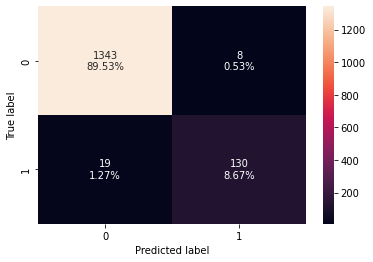

In [172]:
confusion_matrix_sklearn(estimatorf1, X_test, y_test)

In [173]:
decision_tree_tune_perf_f1_test = model_performance_classification_sklearn(
    estimatorf1, X_test, y_test
)
decision_tree_tune_perf_f1_test

,Accuracy,Recall,Precision,F1
0,0.982,0.872483,0.942029,0.905923


* Using F1 score estimator brought more balance between recall and precision. 
But we can still check if any other methods can help improve maximize recall while keeping the f1. Lets try post pruning.

#### Post Pruning

In [177]:
clf = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=50,
                       random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.017428
1,0.000088,0.017516
2,0.000257,0.017774
3,0.000489,0.018263
4,0.000637,0.019536
5,0.002333,0.021869
6,0.003024,0.024893
7,0.003294,0.028187
8,0.006473,0.034659
9,0.023866,0.058525


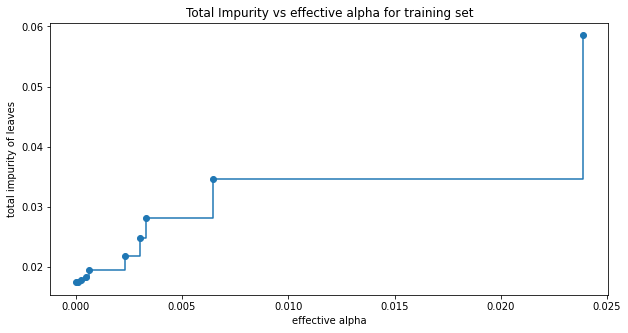

In [178]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [179]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.056364969335601575


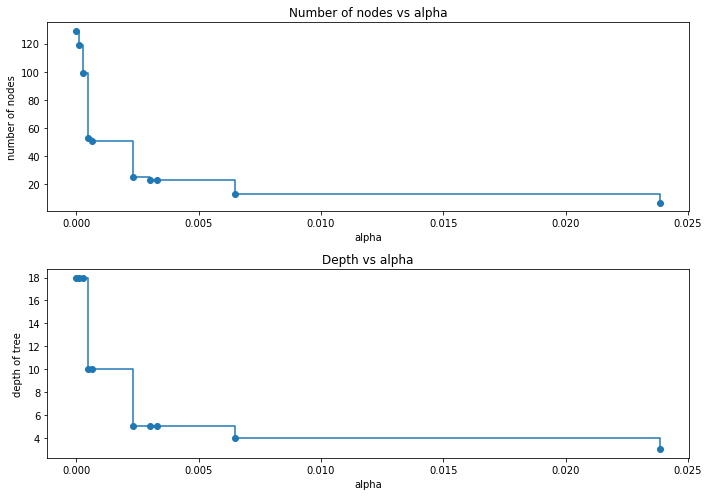

In [180]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [181]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [182]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [183]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

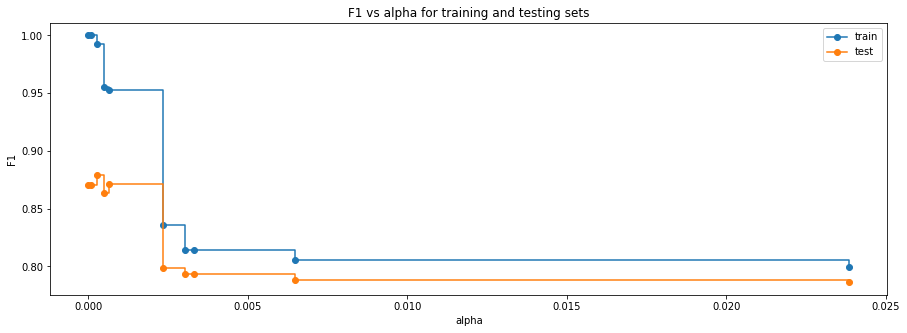

In [184]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [193]:
index_post_model = np.argmax(f1_test)
post_model = clfs[index_post_model]
print(post_model)

DecisionTreeClassifier(ccp_alpha=0.00025733083429978557,
                       class_weight='balanced', random_state=1)


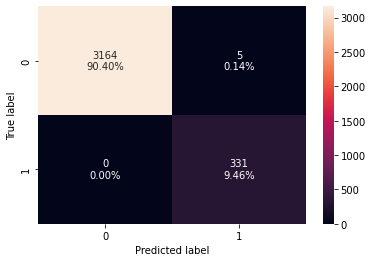

In [194]:
confusion_matrix_sklearn(post_model, X_train, y_train)

In [195]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    post_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.998571,1.0,0.985119,0.992504


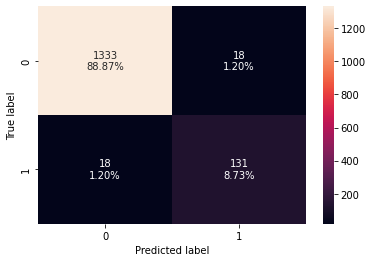

In [196]:
confusion_matrix_sklearn(post_model, X_test, y_test)

In [197]:
decision_tree_post_test = model_performance_classification_sklearn(
    post_model, X_test, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.976,0.879195,0.879195,0.879195


#### Feature importances with recall and f1 estimators

* estimator based on recall

In [120]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

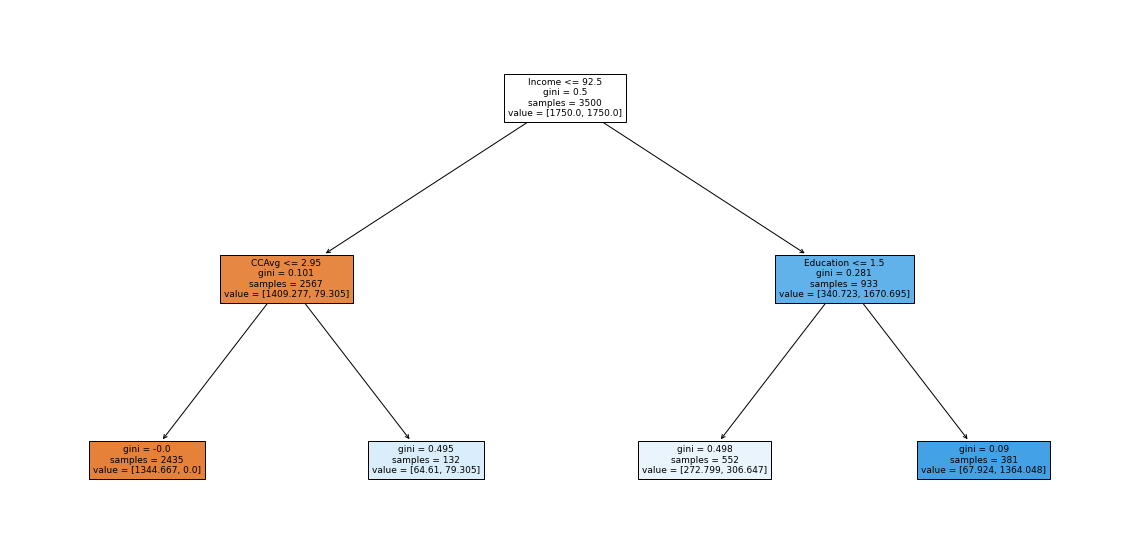

In [121]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [122]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- weights: [272.80, 306.65] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [67.92, 1364.05] class: 1



In [123]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.82007181, 0.        , 0.        ,
       0.06262835, 0.11729984, 0.        , 0.        , 0.        ,
       0.        , 0.        ])

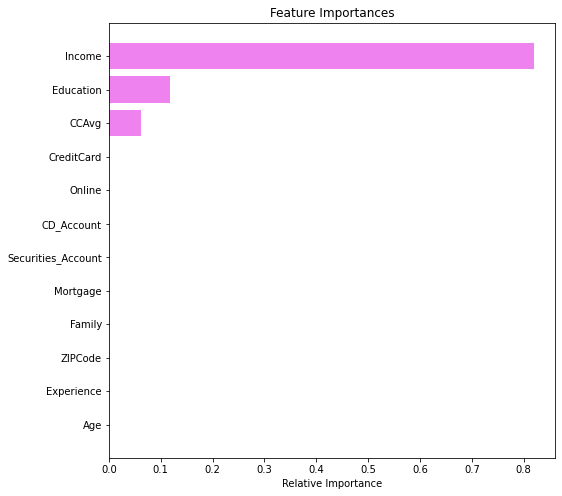

In [124]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* estimator based on F1

In [126]:
feature_names = list(X_train.columns)
importances_f1 = estimatorf1.feature_importances_
indices = np.argsort(importances_f1)

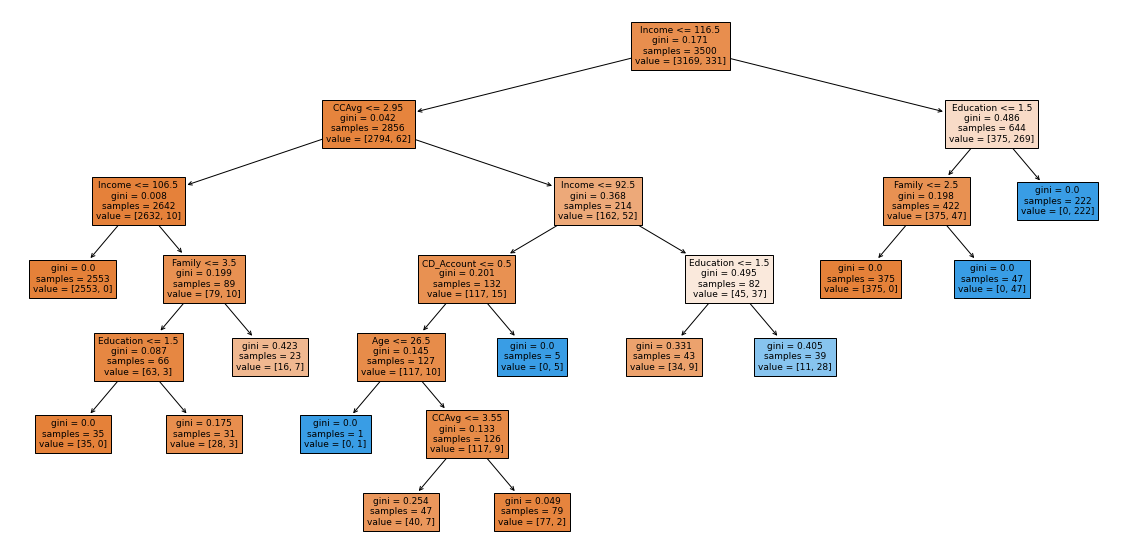

In [127]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimatorf1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [128]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimatorf1, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [28.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- weights: [16.00, 7.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- weights: [40.00, 7.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |   |--- weights: [77.00, 2.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   | 

In [129]:
importances_f1 = estimatorf1.feature_importances_
importances_f1

array([0.0031778 , 0.        , 0.33155818, 0.        , 0.15939476,
       0.04375142, 0.44695104, 0.        , 0.        , 0.01516679,
       0.        , 0.        ])

#### Feature importance based on f1 score pre-pruned model

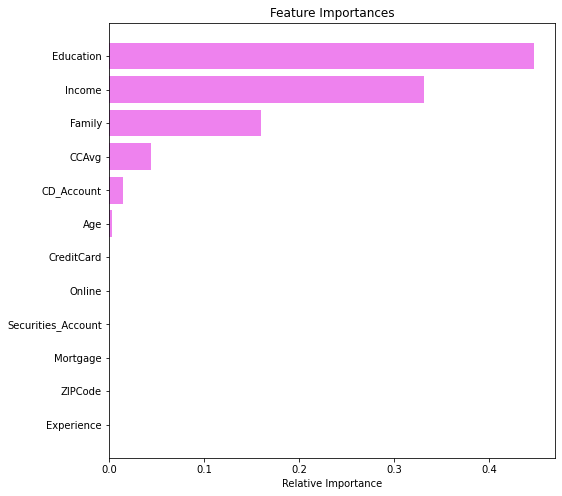

In [130]:
# importance of features in the tree building

importances_f1 = estimatorf1.feature_importances_
indices_f1 = np.argsort(importances_f1)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices_f1)), importances_f1[indices_f1], color="violet", align="center")
plt.yticks(range(len(indices_f1)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Feature importance based on f1 score post-pruned model

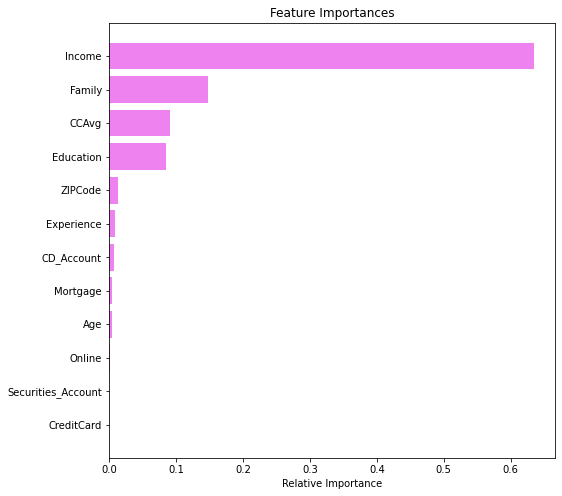

In [198]:
# importance of features in the tree building

importances_post = post_model.feature_importances_
indices_post = np.argsort(importances_post)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices_post)), importances_post[indices_post], color="violet", align="center")
plt.yticks(range(len(indices_post)), [feature_names[i] for i in indices_post])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparison and Final Model Selection

In [190]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_tune_perf_f1_train.T,
        decision_tree_post_perf_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning-with-Recall)",
    "Decision Tree (Pre-Pruning-with-F1)",
    "Decision Tree (Post-Pruning-with-F1)"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning-with-Recall),Decision Tree (Pre-Pruning-with-F1),Decision Tree (Post-Pruning-with-F1)
Accuracy,1.0,1.0,0.790286,0.988857,0.998571
Recall,1.0,1.0,1.000000,0.915408,1.000000
Precision,1.0,1.0,0.310798,0.964968,0.985119
F1,1.0,1.0,0.474212,0.939535,0.992504


In [191]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_tune_perf_f1_test.T,
        decision_tree_post_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning-with-Recall)",
    "Decision Tree (Pre-Pruning-with-F1)",
    "Decision Tree (Post-Pruning-with-F1)"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree without class_weight,Decision Tree with class_weight,Decision Tree (Pre-Pruning-with-Recall),Decision Tree (Pre-Pruning-with-F1),Decision Tree (Post-Pruning-with-F1)
Accuracy,0.980000,0.974667,0.779333,0.982000,0.976000
Recall,0.885906,0.859060,1.000000,0.872483,0.879195
Precision,0.910345,0.882759,0.310417,0.942029,0.879195
F1,0.897959,0.870748,0.473768,0.905923,0.879195


### Model Selection

* Looking at the model scores, the pre-pruned tree with F1 score seems like a good fit model. Because it is able to generalize between training and test data. While maintaining a high recall and precision - and hence better F1 score.
* The post-pruned model though has the same recall score as the pre-pruned one, has weaker F1 score.
* Hence selecting the Pre-pruned Model with F1 score as the best model - DecisionTreeClassifier(max_depth=6, max_leaf_nodes=50, min_samples_split=50, random_state=1)
* So the insights and recommendations are based on Feature importances from the pre-pruned tree with f1 score

## Actionable Insights and Business Recommendations


#### Insights

* Education, Income, Family, CCAvg are the most important features
* The model can identify potential customers 90.5% of the time 

#### What recommedations would you suggest to the bank?

* Target customers with Education - Graduate or Professional
* Income is the next important indicator of whether the person will take a loan. More the income, more probable that the person will take a loan. There are customers with outlier incomes which have not taken a loan yet and are potential customers
* Family size seems to be a slight indicator. People with 3 or 4 people in their family seem to take loan
* Customers with Credit Card accounts and spend on credit cards have a better chance of taking loan


___